In [143]:
import sys 
import os
import pandas as pd
import numpy as np
%load_ext autoreload
#sys.path.insert(0, '../../Churn_Prediction')


sys.path.insert(0, '../../Flights_Delay_Prediction')
from src.config import TRAINING_FILE_TEST,TRAINING_FILE_HISTORY,MODELS,MODEL_TRAINING_FILE
import src.config

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [144]:
TRAINING_FILE_TEST
TRAINING_FILE_HISTORY

'../data/flight_history.csv'

In [145]:
file_path1 = src.config.TRAINING_FILE_TEST
file_path2 = src.config.TRAINING_FILE_HISTORY
delimiter = ","
file_type = 'csv'


flight_test_df_eda = pd.read_csv(file_path1, delimiter=delimiter)
flight_history_df_eda = pd.read_csv(file_path2, delimiter=delimiter)


In [114]:
# Qucik view of the historical data

flight_history_df_eda

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166153,2013,6,30,NaN,1945,NaN,NaN,2104,NaN,EV,5714,N836AS,JFK,IAD,NaN,228,19,45,2013-06-30 19:00:00
166154,2013,6,30,NaN,1610,NaN,NaN,1805,NaN,EV,4092,N16147,EWR,DAY,NaN,533,16,10,2013-06-30 16:00:00
166155,2013,6,30,NaN,1709,NaN,NaN,1856,NaN,EV,4662,N16911,EWR,RDU,NaN,416,17,9,2013-06-30 17:00:00
166156,2013,6,30,NaN,2059,NaN,NaN,2307,NaN,EV,5254,N760EV,LGA,DSM,NaN,1031,20,59,2013-06-30 20:00:00


In [82]:
flight_history_df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166158 entries, 0 to 166157
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            166158 non-null  int64  
 1   month           166158 non-null  int64  
 2   day             166158 non-null  int64  
 3   dep_time        161275 non-null  float64
 4   sched_dep_time  166158 non-null  int64  
 5   dep_delay       161275 non-null  float64
 6   arr_time        161057 non-null  float64
 7   sched_arr_time  166158 non-null  int64  
 8   arr_delay       160678 non-null  float64
 9   carrier         166158 non-null  object 
 10  flight          166158 non-null  int64  
 11  tailnum         164637 non-null  object 
 12  origin          166158 non-null  object 
 13  dest            166158 non-null  object 
 14  air_time        160678 non-null  float64
 15  distance        166158 non-null  int64  
 16  hour            166158 non-null  int64  
 17  minute    

### Duplicate value checks on the history file


In [115]:
# Checking for duplicated values in the historical data.

duplicateRows = flight_history_df_eda.duplicated().sum()
duplicateRows

0

In [116]:
flight_history_df_eda.isnull().sum()

year                 0
month                0
day                  0
dep_time          4883
sched_dep_time       0
dep_delay         4883
arr_time          5101
sched_arr_time       0
arr_delay         5480
carrier              0
flight               0
tailnum           1521
origin               0
dest                 0
air_time          5480
distance             0
hour                 0
minute               0
time_hour            0
dtype: int64

In [117]:
# The original dataframe with number of rows and columns

flight_history_df_eda.shape

(166158, 19)

In [118]:
# We can see that dep_time and dep_delay has the same number of missing records in Flight_history_df_eda
# From the data, we can understand that flights that do not have a dep_time also do not have a dep_delay.
# Flights that do not depart would never have a departure delay. Therefore, we choose to drop those records.


# Dropping the records where the dep_time is NA
 
flight_history_df_eda = flight_history_df_eda.dropna(subset='dep_time')

# Latest NA values in the dataset
flight_history_df_eda.isnull().sum()


year                0
month               0
day                 0
dep_time            0
sched_dep_time      0
dep_delay           0
arr_time          218
sched_arr_time      0
arr_delay         597
carrier             0
flight              0
tailnum             0
origin              0
dest                0
air_time          597
distance            0
hour                0
minute              0
time_hour           0
dtype: int64

In [119]:
# Now, there are 218 rows where the arrival time is NA. We cannot assume any arrival time for the flights on our own.
# Hence we drop the data where arrival time is NA. As per the History data, we see arrival delay as NA, where arrival time is NA.
# Which explains well, that any flight that does not arrive would not have a arrival delay value.


# Dropping the records where the arr_time is NA.
flight_history_df_eda = flight_history_df_eda.dropna(subset='arr_time')


# Latest NA values in the dataset
flight_history_df_eda.isnull().sum()

year                0
month               0
day                 0
dep_time            0
sched_dep_time      0
dep_delay           0
arr_time            0
sched_arr_time      0
arr_delay         379
carrier             0
flight              0
tailnum             0
origin              0
dest                0
air_time          379
distance            0
hour                0
minute              0
time_hour           0
dtype: int64

In [120]:
# There are some more additional records where the arr_delay is NA or null.
# All these rows where the arrival delay have NA values could be imputed with the correct values calculating
# arr_time - sched_arr_time

from datetime import datetime, timedelta

#Varibales for Arrival and Scheduled Arrival Hour/Minute
arrivalHr=0
arrivalMins=0
schArrHr=0
schArrMins=0

#Store the time of Arrival and Departure in List
arrivalTime =[] 
scheduledTime = []
departingTime = []

#Calculate the Arrival Delay
delays=[]

arrivalLen = 0
schedulLen = 0

Departinghours = flight_history_df_eda[flight_history_df_eda['arr_delay'].isna()]['time_hour']
arrivingTime = flight_history_df_eda[flight_history_df_eda['arr_delay'].isna()]['arr_time']
scheduledArrTime = flight_history_df_eda[flight_history_df_eda['arr_delay'].isna()]['sched_arr_time']

for item in arrivingTime:
    arrivalTime.append(item)
          
for item in scheduledArrTime:
    scheduledTime.append(item)

for hr in Departinghours:
    departingTime.append(hr[11:13])

    
#Iterate through each Departing Hours where Arrival Delay is not defined
for item in range(0,len(Departinghours)):

    
    arrivalLen = len(str(arrivalTime[item]))
    schedulLen = len(str(scheduledTime[item]))
    arrivalTime[item]=str(arrivalTime[item])
    scheduledTime[item] = str(scheduledTime[item])

    if arrivalLen == 3:
        arrivalHr = 0
        arrivalMins = arrivalTime[item][0]
    elif arrivalLen == 4:
        arrivalHr = 0
        arrivalMins = arrivalTime[item][:2]
    elif arrivalLen == 5:
        arrivalHr = arrivalTime[item][0]
        arrivalMins = arrivalTime[item][1:3]
    elif arrivalLen == 6:
        arrivalHr = arrivalTime[item][:2]
        arrivalMins = arrivalTime[item][2:4]
   ###########################################     
    if schedulLen == 1:
        scheduledHr=0
        scheduledMins = scheduledTime[item][0]
    elif schedulLen == 2:
        scheduledHr=0
        scheduledMins = scheduledTime[item][:2]
    elif schedulLen == 3:
        scheduledHr = '0'+str(scheduledTime[item][0])
        scheduledMins = scheduledTime[item][1:3]
    elif schedulLen == 4:
        scheduledHr = scheduledTime[item][:2]
        scheduledMins = scheduledTime[item][2:4]
    
    
    #Check if Flight Arrived on the same day
    if str(arrivalHr) > departingTime[item]:
        arrival_total_minutes = int(arrivalHr) * 60 + int(float(arrivalMins))  # Convert arrival time to total minutes
        scheduled_total_minutes = int(scheduledHr) * 60 + int(float(scheduledMins)) # Convert scheduled arrival time to total minutes

        delay_minutes = arrival_total_minutes - scheduled_total_minutes  # Calculate delay in minutes
        
        delays.append(delay_minutes)
        #rows_with_null_arr_delay['arr_delay'].loc[item]=delay_minutes
    
    # Check if flight arrived next day and scheduled arrival was also next day
    elif str(arrivalHr)<departingTime[item] and str(scheduledHr)<departingTime[item]:
        arrival_total_minutes = (int(arrivalHr)+24) * 60 + int(float(arrivalMins))  # Convert arrival time to total minutes
        scheduled_total_minutes = int(scheduledHr+24) * 60 + int(float(scheduledMins)) # Convert scheduled arrival time to total minutes

        delay_minutes = arrival_total_minutes - scheduled_total_minutes  # Calculate delay in minutes
        delays.append(delay_minutes)
    
    #Check if flight arrived next day but scheduled arrival was same day
    elif str(arrivalHr)<departingTime[item] and str(scheduledHr)>departingTime[item]:
        arrival_total_minutes = (int(arrivalHr)+24) * 60 + int(float(arrivalMins))  # Convert arrival time to total minutes
        scheduled_total_minutes = int(scheduledHr) * 60 + int(float(scheduledMins)) # Convert scheduled arrival time to total minutes

        delay_minutes = arrival_total_minutes - scheduled_total_minutes  # Calculate delay in minutes
        delays.append(delay_minutes)


column_name = 'arr_delay'
ind=0

# Iterate through each row and update Arrival Delays
for index, row in flight_history_df_eda.iterrows():
    if pd.isna(row[column_name]):
        # Update the NaN value in the target column
        flight_history_df_eda.loc[index, column_name] = delays[ind]
        ind+=1



In [121]:
# Latest NA values in the dataset
flight_history_df_eda.isnull().sum()

year                0
month               0
day                 0
dep_time            0
sched_dep_time      0
dep_delay           0
arr_time            0
sched_arr_time      0
arr_delay           0
carrier             0
flight              0
tailnum             0
origin              0
dest                0
air_time          379
distance            0
hour                0
minute              0
time_hour           0
dtype: int64

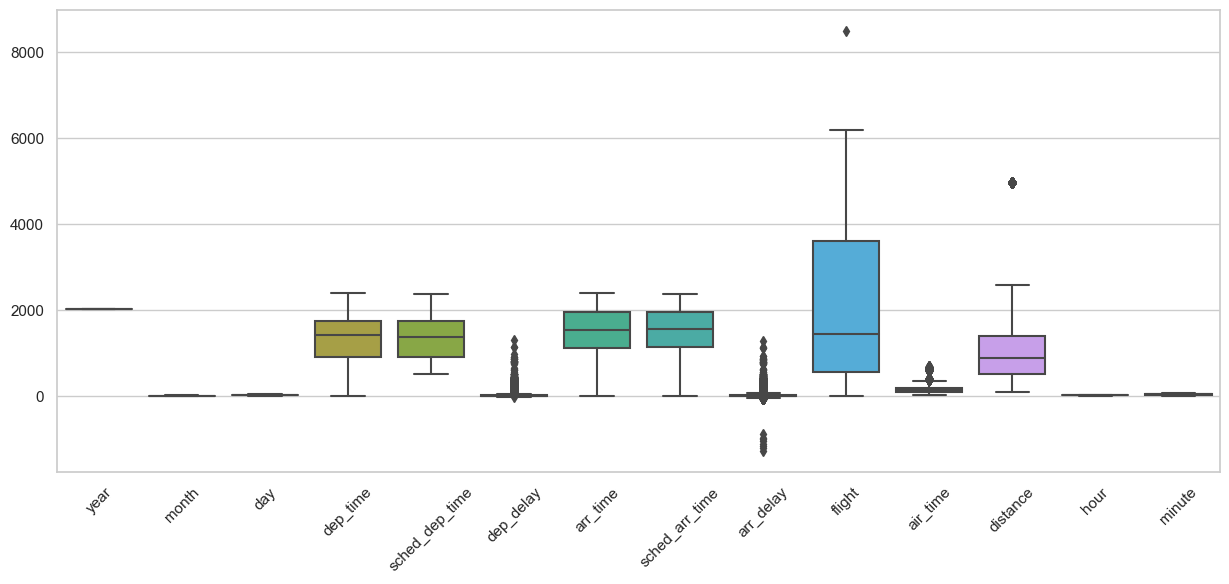

In [122]:
# Check for outlier in data BOX plots for numerical columns
plt.figure(figsize=(15, 6))
sns.boxplot(data=flight_history_df_eda.select_dtypes(include='number'))
plt.xticks(rotation=45)
plt.show()

### We see the distance column shows some outlier values but as per the as per the data and the analysis done these are 
### valid distances between the origin and destination. For instance - JFK to HNL is 4983 miles.

### Departure delay has some values in the thousands i.e in minutes. We analyzed those data (where dep_delay is 1301, 1137), but these records are very less in number indicating not usual delays and are sometimes long distance flights.


### Therefore, we do not perform any outlier analysis on the data and keep them for modeling.

### Data Type coversions for Exploratory Data Analysis

In [123]:
# We create new column to analyze the number of Arrival delays and Departure delays separately.
# Considering that delay accounts to only those rows where the arr_delay or dep_delay value is greater than 0.

flight_history_df_eda['is_ArrDelay'] = (flight_history_df_eda['arr_delay'] > 0).astype(int)
flight_history_df_eda['is_DepDelay'] = (flight_history_df_eda['dep_delay'] > 0).astype(int)

In [124]:
flight_history_df_eda

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,is_ArrDelay,is_DepDelay
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,1,1
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,1,1
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,1,1
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,0,0
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166064,2013,6,30,2354.0,2245,69.0,53.0,2359,54.0,B6,...,N273JB,JFK,SYR,38.0,209,22,45,2013-06-30 22:00:00,1,1
166065,2013,6,30,2354.0,2245,69.0,117.0,1,76.0,B6,...,N358JB,JFK,BTV,68.0,266,22,45,2013-06-30 22:00:00,1,1
166066,2013,6,30,2357.0,2112,165.0,223.0,2359,144.0,UA,...,N541UA,EWR,MCO,133.0,937,21,12,2013-06-30 21:00:00,1,1
166067,2013,6,30,2358.0,2225,93.0,49.0,2330,79.0,EV,...,N753EV,LGA,MHT,37.0,195,22,25,2013-06-30 22:00:00,1,1


### Exploratory Data Analysis

### What is the percentage of delays at Arrival and On-Time Arrivals

In [125]:
flight_history_df_eda['is_ArrDelay'].value_counts()

0    93316
1    67741
Name: is_ArrDelay, dtype: int64

In [126]:
flight_history_df_eda['is_DepDelay'].value_counts()

0    96716
1    64341
Name: is_DepDelay, dtype: int64

# The data in the history.csv has only 2599 rows that have no arrival delays. Which means majority of the data has delays even if its by 1 minute.

In [127]:

# Percentage of Arrival Delays and On time Arrivals

rows = flight_history_df_eda.shape[0]

print('Percentage of Arrival Delays : ',round(flight_history_df_eda['is_ArrDelay'].value_counts()[1]/rows*100,2),'%')
print('Percentage of On-Time Arrivals : ',round(flight_history_df_eda['is_ArrDelay'].value_counts()[0]/rows*100,2),'%')

Percentage of Arrival Delays :  42.06 %
Percentage of On-Time Arrivals :  57.94 %


<AxesSubplot: xlabel='is_ArrDelay', ylabel='count'>

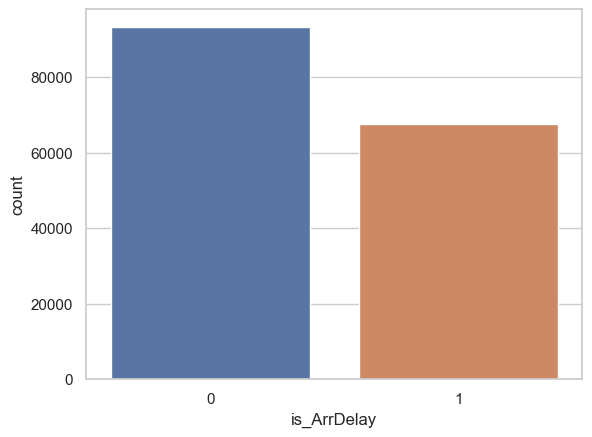

In [128]:
sns.countplot(x='is_ArrDelay',data=flight_history_df_eda)

### Number of flights per carrier

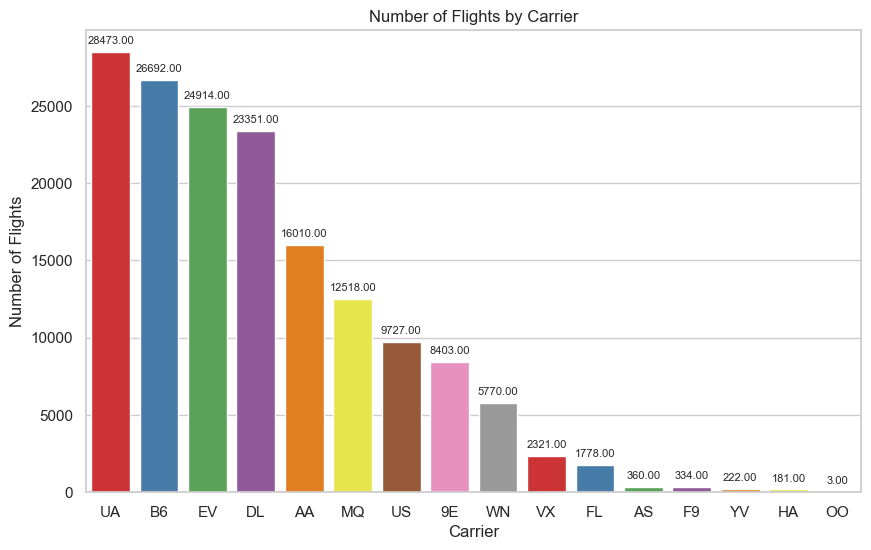

In [129]:
total_carrier_num = flight_history_df_eda.groupby('carrier').size().reset_index(name='num_flights')
total_carrier_num = total_carrier_num.sort_values(by='num_flights',ascending=False)
# Visulaize the number of flights from different carriers
# Plot the results
plt.figure(figsize=(10, 6))
plots =sns.barplot(x='carrier', y='num_flights', data=total_carrier_num, palette='Set1')
for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.2f'),
                    (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                    size=8, xytext=(0, 8),
                    textcoords='offset points')
plt.title('Number of Flights by Carrier')
plt.xlabel('Carrier')
plt.ylabel('Number of Flights')
plt.show()

### Total number of Delayed flights by Carrier

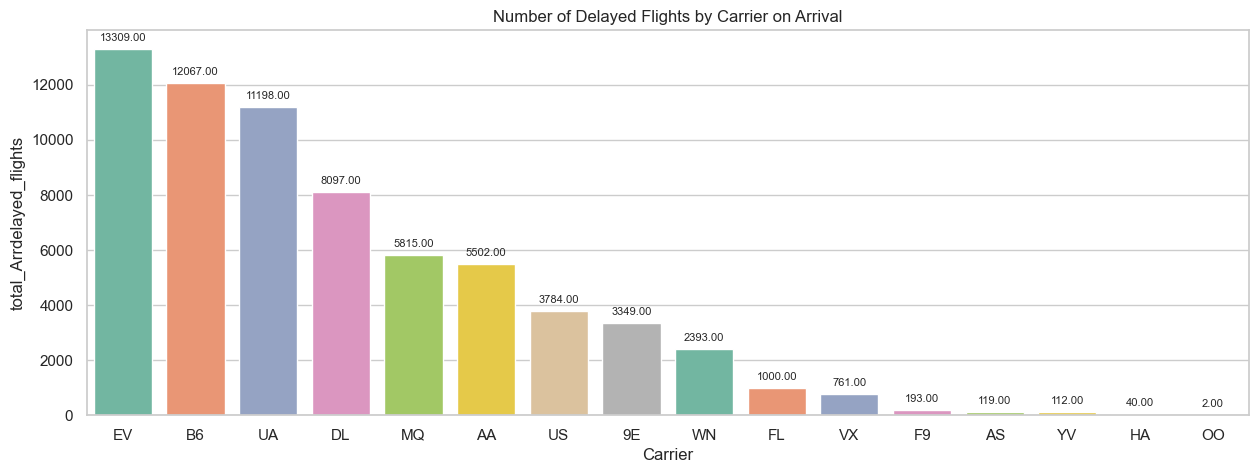

In [130]:
total_carr_Arrdelayed_flights =  flight_history_df_eda.groupby('carrier')['is_ArrDelay'].sum().reset_index(name='total_Arrdelayed_flights')
total_carr_Arrdelayed_flights = total_carr_Arrdelayed_flights.sort_values(by='total_Arrdelayed_flights', ascending=False)
# Visulaize Average Departure Delay by cariier
plt.figure(figsize=(15,5))
plots = sns.barplot(x=total_carr_Arrdelayed_flights['carrier'], y=total_carr_Arrdelayed_flights['total_Arrdelayed_flights'],  data = total_carr_Arrdelayed_flights,palette='Set2')
for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.2f'),
                    (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                    size=8, xytext=(0, 8),
                    textcoords='offset points')

plt.title('Number of Delayed Flights by Carrier on Arrival')
plt.xlabel('Carrier')
plt.ylabel('total_Arrdelayed_flights')
plt.show()

### Number of flights each Month

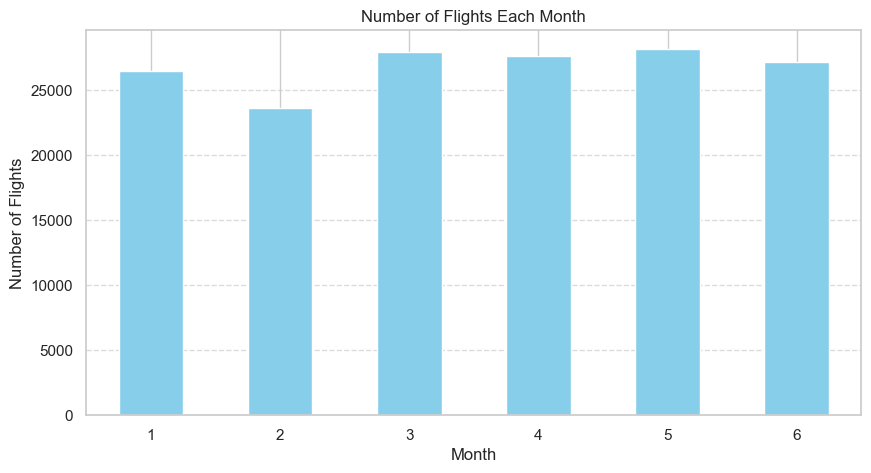

In [131]:
# Claulating the number of flights grouping by month
monthly_flight_count = flight_history_df_eda.groupby('month').size()

#Visulaizing the monthly distribution

plt.figure(figsize=(10, 5))
monthly_flight_count.plot(kind='bar', color='skyblue')
plt.title('Number of Flights Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.xticks(rotation=0)  
plt.grid(axis='y', linestyle='--', alpha=0.7) 

plt.show()

### Flights are almost distributed fairly even among the months, but there is a slight decline at the beginning of the year in the month of January and February.

### Average Arrival Delay by Carrier

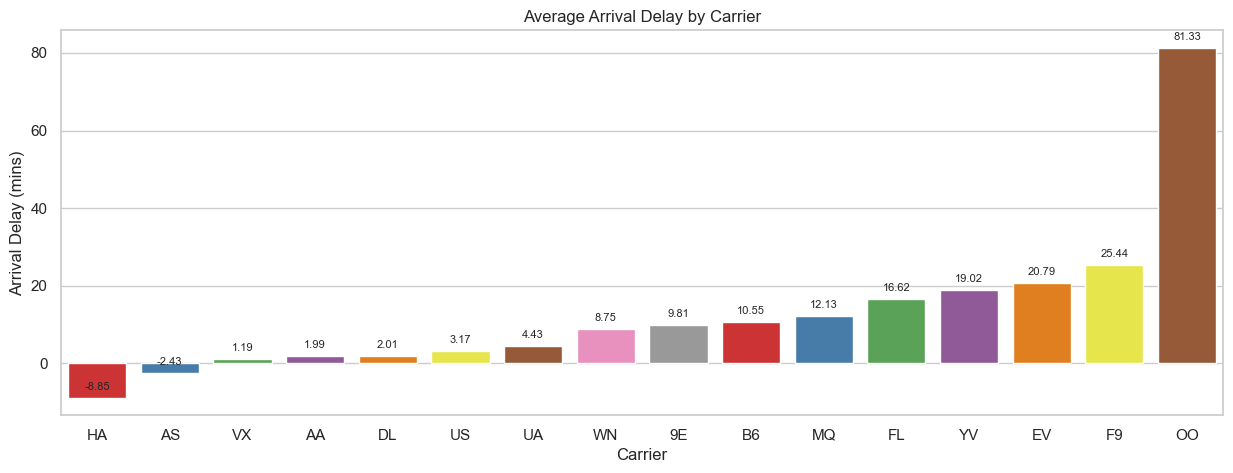

In [132]:
# Average Arrival Delay by Carrier
avg_arr_delay_carrier = flight_history_df_eda.groupby('carrier')['arr_delay'].mean().reset_index(name ='arrival_delay')
avg_arr_delay_carrier['arrival_delay'] = round(avg_arr_delay_carrier['arrival_delay'],2)
avg_arr_delay_carrier = avg_arr_delay_carrier.sort_values(by='arrival_delay')

# Visulaize Average Arrival Delay by cariier
plt.figure(figsize=(15,5))
plots =sns.barplot(x=avg_arr_delay_carrier['carrier'], y=avg_arr_delay_carrier['arrival_delay'],  data = avg_arr_delay_carrier,palette='Set1')
for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.2f'),
                    (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                    size=8, xytext=(0, 8),
                    textcoords='offset points')
plt.title('Average Arrival Delay by Carrier')
plt.xlabel('Carrier')
plt.ylabel('Arrival Delay (mins)')
plt.show()

### Major Carrier with Average Arrival Delay are -
1. OO
2. F9
3. EV

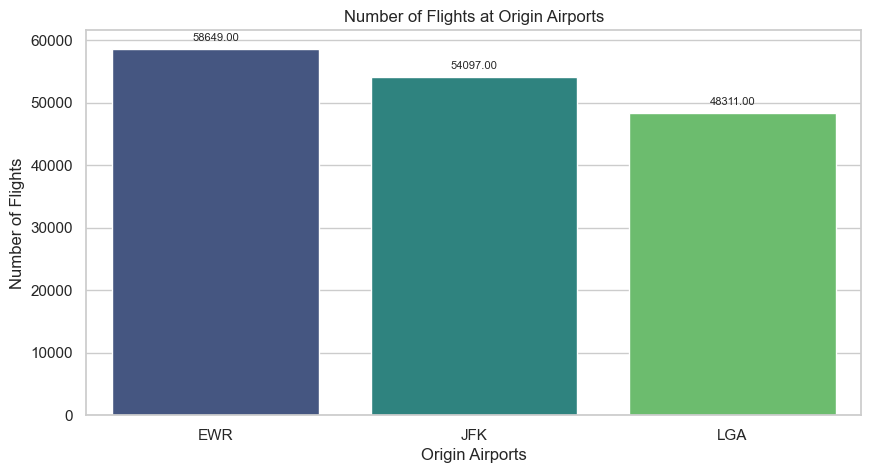

In [133]:
# Number of flights from Origin Airports
origin_flights = flight_history_df_eda.groupby('origin').size().reset_index(name='num_flights')
origin_flights = origin_flights.sort_values(by='num_flights', ascending =False)
# Visulaize the number of flights from different origin airports
plt.figure(figsize=(10, 5))
plots = sns.barplot(x='origin', y='num_flights', data=origin_flights, palette='viridis')
for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.2f'),
                    (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                    size=8, xytext=(0, 8),
                    textcoords='offset points')
plt.title('Number of Flights at Origin Airports')
plt.xlabel('Origin Airports')
plt.ylabel('Number of Flights')
plt.show()

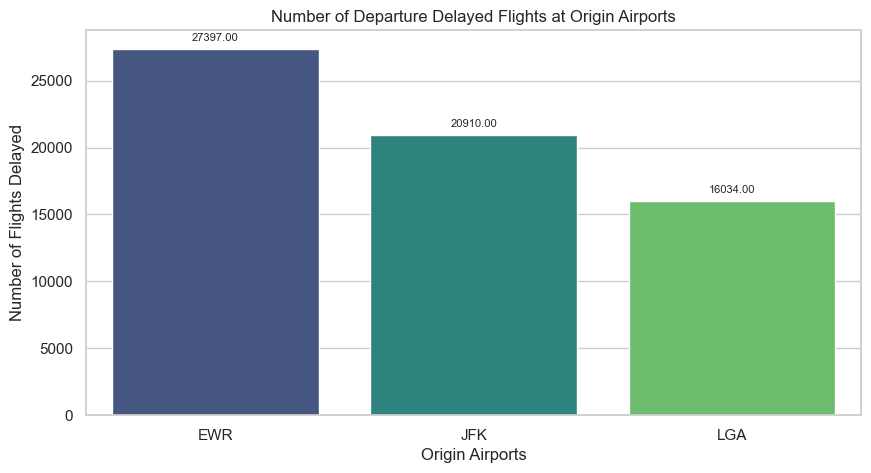

In [134]:
# Number of Departure Delayed flights from Origin Airports

late_departures_by_origin = flight_history_df_eda[flight_history_df_eda['dep_delay'] > 0].groupby('origin')['dep_delay'].count().reset_index(name='Num_Late_Departures')
late_departures_by_origin = late_departures_by_origin.sort_values(by='Num_Late_Departures', ascending =False)


# Visulaize the number of flights from different origin airports
plt.figure(figsize=(10, 5))
plots = sns.barplot(x='origin', y='Num_Late_Departures', data=late_departures_by_origin, palette='viridis')
for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.2f'),
                    (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                    size=8, xytext=(0, 8),
                    textcoords='offset points')
plt.title('Number of Departure Delayed Flights at Origin Airports')
plt.xlabel('Origin Airports')
plt.ylabel('Number of Flights Delayed')
plt.show()

### Percentage of delayed flights from Origin Airports 

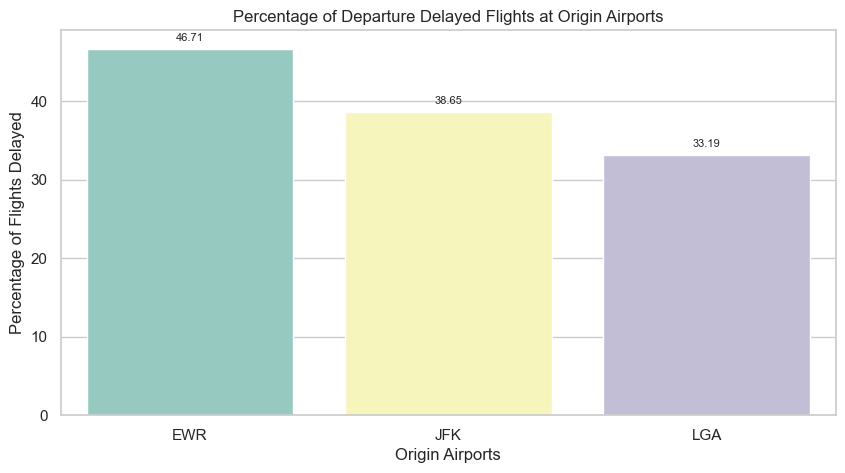

In [135]:
# Percentage of Departure Delayed flights from Origin Airports
# Here we merge the dataframes to calculate the percentage value of departure delay flights

merge_df = pd.merge(origin_flights,late_departures_by_origin, how='inner',on='origin' )
merge_df['Percentage_Delayed'] = round(merge_df['Num_Late_Departures']/merge_df['num_flights']*100,2)
merge_df = merge_df.sort_values(by='Percentage_Delayed', ascending=False)


# Visulaize the number of flights from different origin airports
plt.figure(figsize=(10, 5))
plots = sns.barplot(x='origin', y='Percentage_Delayed', data=merge_df, palette='Set3')
for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.2f'),
                    (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                    size=8, xytext=(0, 8),
                    textcoords='offset points')
plt.title('Percentage of Departure Delayed Flights at Origin Airports')
plt.xlabel('Origin Airports')
plt.ylabel('Percentage of Flights Delayed')
plt.show()

### What is the mean Departure delay based on Origin

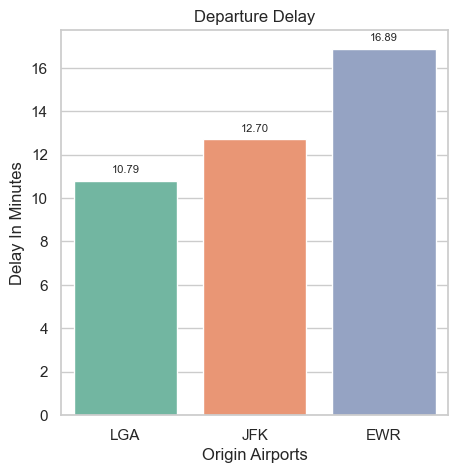

In [136]:
origin_dep_delay = flight_history_df_eda.groupby('origin')['dep_delay'].mean().reset_index(name ='origin_dep_delay')
origin_dep_delay['origin_dep_delay'] = round(origin_dep_delay['origin_dep_delay'],2)
origin_dep_delay = origin_dep_delay.sort_values(by = 'origin_dep_delay')

# Visulaize the Average Departure  Delay at Airports
plt.figure(figsize=(5, 5))
plots = sns.barplot(x='origin', y='origin_dep_delay', data =origin_dep_delay, palette='Set2')
for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.2f'),
                    (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                    size=8, xytext=(0, 8),
                    textcoords='offset points')
plt.title('Departure Delay')
plt.xlabel('Origin Airports')
plt.ylabel('Delay In Minutes')
plt.show()

### What is the Mean Arrival delay based on the Origin Airports

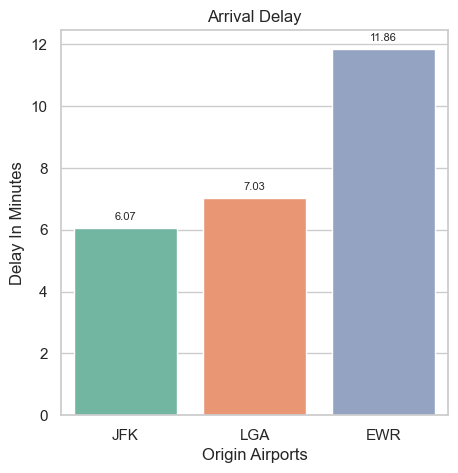

In [137]:
origin_arr_delay = flight_history_df_eda.groupby('origin')['arr_delay'].mean().reset_index(name ='origin_arr_delay')
origin_arr_delay['origin_arr_delay'] = round(origin_arr_delay['origin_arr_delay'],2)
origin_arr_delay = origin_arr_delay.sort_values(by = 'origin_arr_delay')

# Visulaize the Average Departure  Delay at Airports
plt.figure(figsize=(5, 5))
plots = sns.barplot(x='origin', y='origin_arr_delay', data =origin_arr_delay, palette='Set2')
for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.2f'),
                    (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                    size=8, xytext=(0, 8),
                    textcoords='offset points')
plt.title('Arrival Delay')
plt.xlabel('Origin Airports')
plt.ylabel('Delay In Minutes')
plt.show()

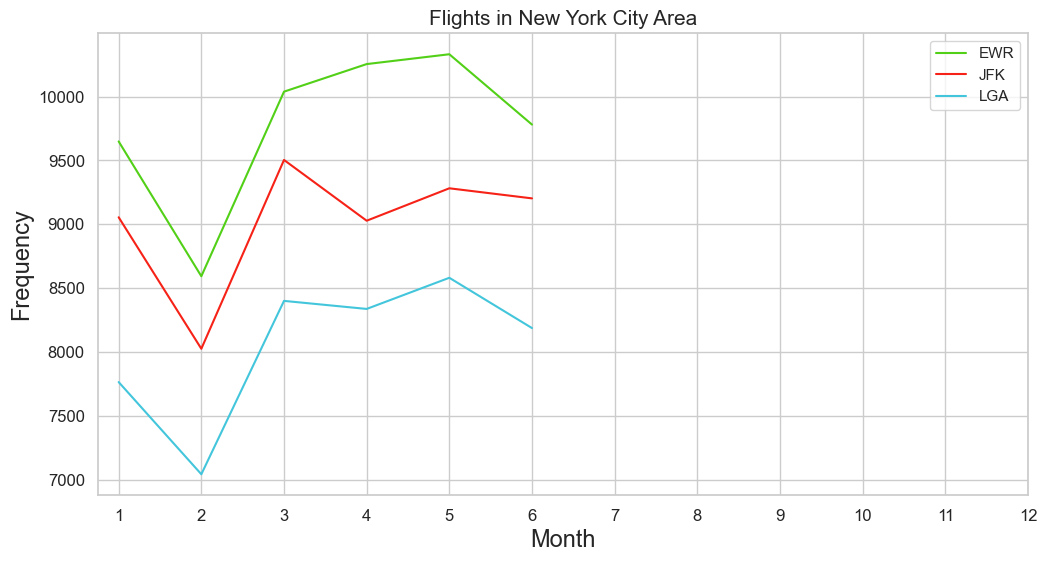

In [138]:
fig = plt.figure(1, figsize = (12, 6))
flight_history_df_eda[flight_history_df_eda['origin'] == 'EWR']['month'].value_counts().sort_index().plot(kind = 'line', color = '#52D017')
flight_history_df_eda[flight_history_df_eda['origin'] == 'JFK']['month'].value_counts().sort_index().plot(kind = 'line', color = '#F62217')
flight_history_df_eda[flight_history_df_eda['origin'] == 'LGA']['month'].value_counts().sort_index().plot(kind = 'line', color = '#43C6DB')

plt.title("Flights in New York City Area", size = 15)
plt.xticks(range(1, 13), size = 12)
plt.yticks(size = 12)
plt.xlabel("Month", size = 17)
plt.ylabel("Frequency", size = 17)
plt.legend(['EWR', 'JFK', 'LGA'])

In [139]:
flight_history_df_eda.shape

(161057, 21)

In [140]:
flight_history_df_eda.to_csv('final_processed_history_df.csv',index=False)

### Flight_Test.csv Exploratory Data Analysis

In [146]:
flight_test_df_eda.shape

(6000, 15)

In [147]:
# Checking for duplicates in flight_Test.csv
duplicateTestrows = flight_test_df_eda.duplicated().sum()
duplicateTestrows

0

In [148]:
flight_test_df_eda.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   uniqueid        6000 non-null   int64  
 1   year            6000 non-null   int64  
 2   month           6000 non-null   int64  
 3   day             6000 non-null   int64  
 4   sched_dep_time  6000 non-null   int64  
 5   sched_arr_time  6000 non-null   int64  
 6   carrier         6000 non-null   object 
 7   flight          6000 non-null   int64  
 8   tailnum         5948 non-null   object 
 9   origin          6000 non-null   object 
 10  dest            6000 non-null   object 
 11  hour            6000 non-null   int64  
 12  minute          6000 non-null   int64  
 13  time_hour       6000 non-null   object 
 14  lateflight      5786 non-null   float64
dtypes: float64(1), int64(9), object(5)
memory usage: 703.2+ KB


In [149]:
# Checking the number of Null values in the dataframe for all the columns

flight_test_df_eda.isnull().sum()

uniqueid            0
year                0
month               0
day                 0
sched_dep_time      0
sched_arr_time      0
carrier             0
flight              0
tailnum            52
origin              0
dest                0
hour                0
minute              0
time_hour           0
lateflight        214
dtype: int64

### Since this is just one month data, it would be better to drop the rows where the lateflight column has null values. The number of rows with null values in our target (lateflight) column is very small and hence we shoudl refrain from making any assumption towards imputaing value in the target column. Hence we drop the rows.

In [150]:
#Dropping the rows with NA values in lateflight

flight_test_df_eda = flight_test_df_eda.dropna(subset=['lateflight'])
flight_test_df_eda

# Coverting the data type of the taregt column to int from float.
flight_test_df_eda['lateflight'] = flight_test_df_eda['lateflight'].astype('int')

In [151]:
flight_test_df_eda.shape

(5786, 15)

In [152]:
# Counting the number of values for each unique value in our target column. To see the distribution of values.

flight_test_df_eda['lateflight'].value_counts()


0    3088
1    2698
Name: lateflight, dtype: int64

### For the month of July, we calculate the percentage of delayed flights by Carrier.

In [153]:
def percentage_delayed_flights_by_carrier(df):
    
    # Filter rows where lateflight is 1 (indicating a delayed flight)
    delayed_flights = flight_test_df_eda[flight_test_df_eda['lateflight'] == 1]
    
    # Calculate the total number of flights for each carrier
    total_flights_per_carrier = flight_test_df_eda['carrier'].value_counts()
    
    # Calculate the number of delayed flights for each carrier
    delayed_flights_per_carrier = delayed_flights['carrier'].value_counts()
    
    # Calculate the percentage of delayed flights for each carrier
    delayed_percentage = (delayed_flights_per_carrier / total_flights_per_carrier) * 100
    
    return delayed_percentage

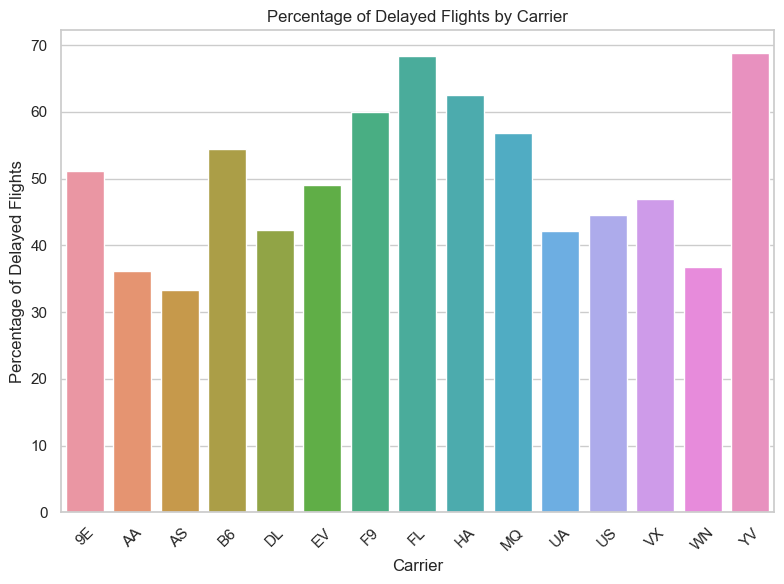

In [154]:
# Calling the function on the dataframe.

delayed_percentage = percentage_delayed_flights_by_carrier(flight_test_df_eda)

# Visualizing the plot for the percentage of delayed flights in July 2013.

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.barplot(x=delayed_percentage.index, y=delayed_percentage.values)
plt.title('Percentage of Delayed Flights by Carrier')
plt.xlabel('Carrier')
plt.ylabel('Percentage of Delayed Flights')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### For the month of July as per the data, what is the percentage of flights delayed based on the origin.

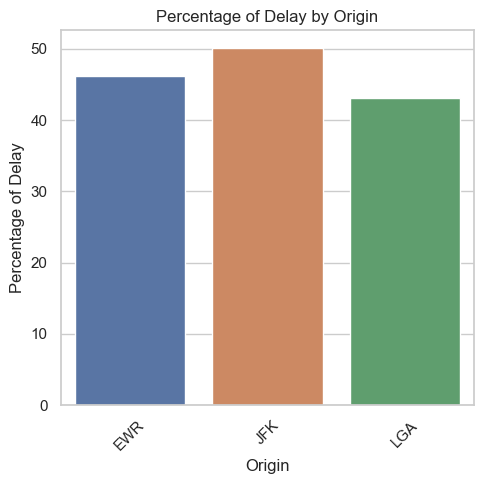

In [155]:
# Calculate the total number of flights for each origin
total_flights_origin = flight_test_df_eda['origin'].value_counts()

# Calculate the number of delayed flights for each origin
delayed_flights_origin = flight_test_df_eda[flight_test_df_eda['lateflight'] == 1]['origin'].value_counts()

# Calculate the percentage of delay for each origin
percentage_delay_origin = (delayed_flights_origin / total_flights_origin) * 100


# Plotting the data

plt.figure(figsize=(5, 5))
sns.barplot(x=percentage_delay_origin.index, y=percentage_delay_origin.values)
plt.title('Percentage of Delay by Origin')
plt.xlabel('Origin')
plt.ylabel('Percentage of Delay')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [156]:
flight_test_df_eda.shape

(5786, 15)

In [159]:
flight_test_df_eda.to_csv('../data/final_test_processed_df.csv',index=False)